In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100, weights=None):
        self.input_size = input_size
        self.weights = weights
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # List to store accuracies for each epoch

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights)  # No need to reshape self.weights
        return sigmoid(summation)

    def calculate_accuracy(self, training_inputs, labels):
        predictions = [round(self.predict(inputs)) for inputs in training_inputs]
        correct_predictions = np.sum(predictions == labels)
        accuracy = correct_predictions / len(labels)
        return accuracy

    def train(self, training_inputs, labels):
        self.accuracies = []  # Reset accuracies for each training session

        for epoch in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.learning_rate * error * prediction * (1 - prediction) * inputs

            # Calculate accuracy for the current epoch
            accuracy = self.calculate_accuracy(training_inputs, labels)
            self.accuracies.append(1/accuracy)

            # Print accuracy for the current epoch
            print("Epoch: " + str(epoch) + " Accuracy: " + str(accuracy))



In [2]:
x = pd.read_csv('./XY/X.csv')
x = x.drop(x.columns[0], axis=1)
#header column 0 is X and column 1 is Y
x.columns = ['X', 'Y']

x

,X,Y
0,0.741074,0.032447
1,4.794975,0.404499
2,1.672767,3.685057
3,3.571626,1.126299
4,4.146296,2.519701
...,...,...
194,3.035141,4.776586
195,4.343927,1.170200
196,3.656601,2.025832
197,4.031428,3.240811


In [3]:
y = pd.read_csv('./XY/Y.csv')   
y = y.drop(y.columns[0], axis=1)
y.columns = ['Y']
y

,Y
0,0
1,0
2,1
3,0
4,0
...,...
194,1
195,0
196,0
197,0


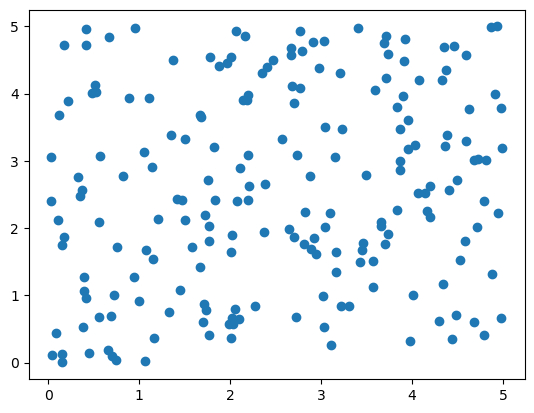

In [4]:
plt.scatter(x['X'], x['Y'])

In [5]:

x = x.to_numpy()
y = y.to_numpy()


perceptron = Perceptron(input_size=training_inputs.shape[1], epochs=100, learning_rate=0.01, weights=np.random.rand(6))
perceptron.train(x, y)


    


NameError: name 'training_inputs' is not defined

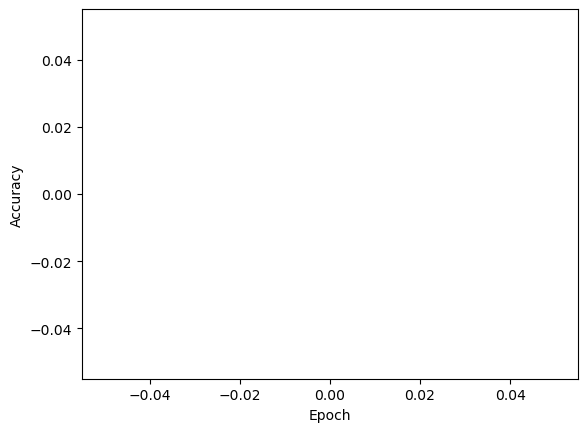

In [ ]:
# Plot the accuracy graph
plt.plot(perceptron.accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

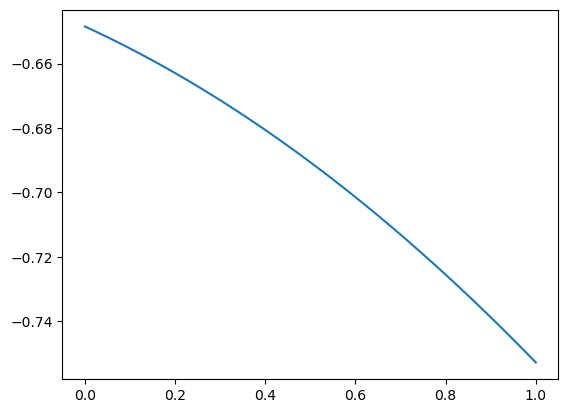

In [ ]:
# Plot the decision boundary
x_values = np.linspace(0, 1, 100)
y_values = -(perceptron.weights[0] + perceptron.weights[1] * x_values + perceptron.weights[3] * x_values**2) / perceptron.weights[2]
plt.plot(x_values, y_values, label='Decision Boundary')
plt.scatter(x['X'], x['Y'], c=y['Y'], cmap='rainbow')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function activation function
sigmoid = lambda x: 1 / (1 + np.exp(-x))

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100, weights=None):
        self.weights = weights
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # List to store accuracies for each epoch

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return sigmoid(summation)

    def calculate_accuracy(self, training_inputs, labels):
        predictions = [round(self.predict(inputs)) for inputs in training_inputs]
        correct_predictions = np.sum(predictions == labels)
        accuracy = correct_predictions / len(labels)
        return accuracy

    def train(self, training_inputs, labels, batch_size=32):
        self.accuracies = []  # Reset accuracies for each training session

        for epoch in range(self.epochs):
            for i in range(0, len(training_inputs), batch_size):
                batch_inputs = training_inputs[i:i + batch_size]
                batch_labels = labels[i:i + batch_size]

                predictions = self.predict(batch_inputs)
                errors = batch_labels - predictions

                # Update weights using batch gradient descent
                self.weights[1:] += self.learning_rate * np.mean(errors * predictions * (1 - predictions) * batch_inputs.T, axis=1)
                self.weights[0] += self.learning_rate * np.mean(errors * predictions * (1 - predictions))

            # Calculate accuracy for the current epoch
            accuracy = self.calculate_accuracy(training_inputs, labels)
            self.accuracies.append(1 / accuracy)

            # Print accuracy for the current epoch
            print("Epoch: " + str(epoch) + " Accuracy: " + str(accuracy))


# Initialize and train the perceptron

X = pd.read_csv('./XY/X.csv')
X = X.drop(X.columns[0], axis=1)
#header column 0 is X and column 1 is Y
X.columns = ['X', 'Y']

y_true = pd.read_csv('./XY/Y.csv')
y_true = y_true.drop(y_true.columns[0], axis=1)
y_true.columns = ['Y']

X = X.to_numpy()
y_true = y_true.to_numpy()

features = X.shape[1]




perceptron = Perceptron(learning_rate=0.01, epochs=1000, weights=np.random.rand(features + 1))
perceptron.train(X, y_true, batch_size=32)

# Plot the accuracy graph
plt.plot(perceptron.accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


ValueError: operands could not be broadcast together with shapes (32,32) (2,32) 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function activation function
sigmoid = lambda x: 1 / (1 + np.exp(-x))

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100, weights=None):
        self.weights = weights if weights is not None else np.random.rand(3)
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # List to store accuracies for each epoch

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return sigmoid(summation)

    def calculate_accuracy(self, training_inputs, labels):
        predictions = [round(self.predict(inputs)) for inputs in training_inputs]
        correct_predictions = np.sum(predictions == labels)
        accuracy = correct_predictions / len(labels)
        return accuracy

    def train(self, training_inputs, labels, batch_size):
        self.accuracies = []  # Reset accuracies for each training session

        for epoch in range(self.epochs):
            for i in range(0, len(training_inputs), batch_size):
                batch_inputs = training_inputs[i:i + batch_size]
                batch_labels = labels[i:i + batch_size]

                for inputs, label in zip(batch_inputs, batch_labels):
                    prediction = self.predict(inputs)
                    error = label - prediction
                    self.weights[1:] += self.learning_rate * error * prediction * (1 - prediction) * inputs
                    self.weights[0] += self.learning_rate * error * prediction * (1 - prediction)

                # Calculate accuracy for the current epoch
                accuracy = self.calculate_accuracy(training_inputs, labels)
                self.accuracies.append(1 / accuracy)

            # Print accuracy for the current epoch
            print("Epoch: " + str(epoch) + " Accuracy: " + str(accuracy))

# Rest of the code remains unchanged

# Example usage:
# Assuming you have training data and labels (training_inputs, labels)
training_inputs = pd.read_csv('./XY/X.csv')
training_inputs = training_inputs.drop(training_inputs.columns[0], axis=1)
#header column 0 is X and column 1 is Y
training_inputs.columns = ['X', 'Y']

labels = pd.read_csv('./XY/Y.csv')
labels = labels.drop(labels.columns[0], axis=1)
labels.columns = ['Y']


# Initialize perceptron with appropriate input size
perceptron = Perceptron(learning_rate=0.01, epochs=100)

# Set the batch size
batch_size = 32

# Train the perceptron with batches
perceptron.train(training_inputs, labels, batch_size)

# Plot the decision boundary
plot_decision_boundary(perceptron, training_inputs, labels)


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U1'), dtype('<U32')) -> None

In [ ]:
import numpy as np

class PerceptronBatch:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.weights = np.zeros(input_size + 1)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return 1 if summation > 0 else 0

    def train(self, training_inputs, labels):
        for epoch in range(self.epochs):
            predictions = np.array([self.predict(x) for x in training_inputs])
            errors = labels - predictions
            self.weights[1:] += self.learning_rate * np.dot(errors, training_inputs)
            self.weights[0] += self.learning_rate * np.sum(errors)


In [ ]:
import numpy as np

class PerceptronBatch:
    def __init__(self, input_size, learning_rate=0.01, epochs=100, weights=None):
        self.weights = weights
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # Array para almacenar la precisión por época

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return 1 if summation > 0 else 0

    def calculate_accuracy(self, predictions, labels):
        correct_predictions = np.sum(predictions == labels)
        total_predictions = len(labels)
        accuracy = correct_predictions / total_predictions
        return accuracy

    def train(self, training_inputs, labels):
        for epoch in range(self.epochs):
            predictions = np.array([self.predict(x) for x in training_inputs])
            errors = labels - predictions
            self.weights[1:] += self.learning_rate * np.dot(errors, training_inputs)
            self.weights[0] += self.learning_rate * np.sum(errors)

            accuracy = self.calculate_accuracy(predictions, labels)
            self.accuracies.append(1/accuracy)

            print(f'Epochs {epoch + 1}/{self.epochs}, Accuracy: {accuracy}')




In [ ]:
import numpy as np

training_inputs = pd.read_csv('./XY/X.csv')
training_inputs = training_inputs.drop(training_inputs.columns[0], axis=1)
#header column 0 is X and column 1 is Y
training_inputs.columns = ['X', 'Y']
training_inputs = training_inputs.to_numpy()


labels = pd.read_csv('./XY/Y.csv')
labels = labels.drop(labels.columns[0], axis=1)
labels.columns = ['Y']
labels = labels.to_numpy().reshape(-1)


# Crear un perceptrón de aprendizaje de lote
perceptron = PerceptronBatch(input_size=2, learning_rate=0.01, epochs=100, weights=np.random.rand(3))

# Entrenar el perceptrón
perceptron.train(training_inputs, labels)



Epochs 1/100, Accuracy: 0.37185929648241206
Epochs 2/100, Accuracy: 0.628140703517588
Epochs 3/100, Accuracy: 0.5125628140703518
Epochs 4/100, Accuracy: 0.628140703517588
Epochs 5/100, Accuracy: 0.5477386934673367
Epochs 6/100, Accuracy: 0.6633165829145728
Epochs 7/100, Accuracy: 0.5979899497487438
Epochs 8/100, Accuracy: 0.6884422110552764
Epochs 9/100, Accuracy: 0.6331658291457286
Epochs 10/100, Accuracy: 0.7336683417085427
Epochs 11/100, Accuracy: 0.6482412060301508
Epochs 12/100, Accuracy: 0.7738693467336684
Epochs 13/100, Accuracy: 0.7487437185929648
Epochs 14/100, Accuracy: 0.8040201005025126
Epochs 15/100, Accuracy: 0.7788944723618091
Epochs 16/100, Accuracy: 0.8140703517587939
Epochs 17/100, Accuracy: 0.7738693467336684
Epochs 18/100, Accuracy: 0.8241206030150754
Epochs 19/100, Accuracy: 0.7386934673366834
Epochs 20/100, Accuracy: 0.7939698492462312
Epochs 21/100, Accuracy: 0.7135678391959799
Epochs 22/100, Accuracy: 0.7638190954773869
Epochs 23/100, Accuracy: 0.698492462311557

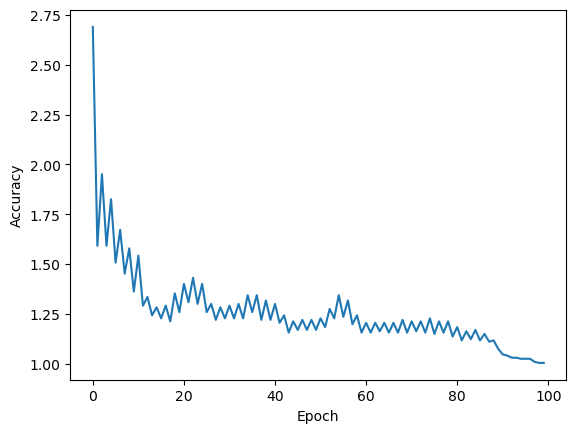

In [ ]:
# Plot the accuracy graph
plt.plot(perceptron.accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
